In [78]:
import pandas as pd 
import numpy as np 
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score , StratifiedKFold , KFold ,  GridSearchCV, RandomizedSearchCV , cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import LinearSVC,SVC,LinearSVR
from sklearn.preprocessing import StandardScaler    , MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score,precision_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons ,load_iris  
from sklearn.decomposition import PCA , KernelPCA , SparsePCA , IncrementalPCA
from sklearn.metrics import accuracy_score,recall_score,precision_recall_curve,roc_curve,classification_report , confusion_matrix , f1_score , recall_score , roc_auc_score ,ConfusionMatrixDisplay
 

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
import matplotlib.patches as mpatches

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier , VotingClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform

In [79]:
file_path = '../datasets files/data.csv'
def load_Data (file_path):
    return pd.read_csv(file_path)

df=load_Data(file_path)


In [80]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [81]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [82]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [83]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [84]:
 df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [85]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [86]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [88]:
df.head(25)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


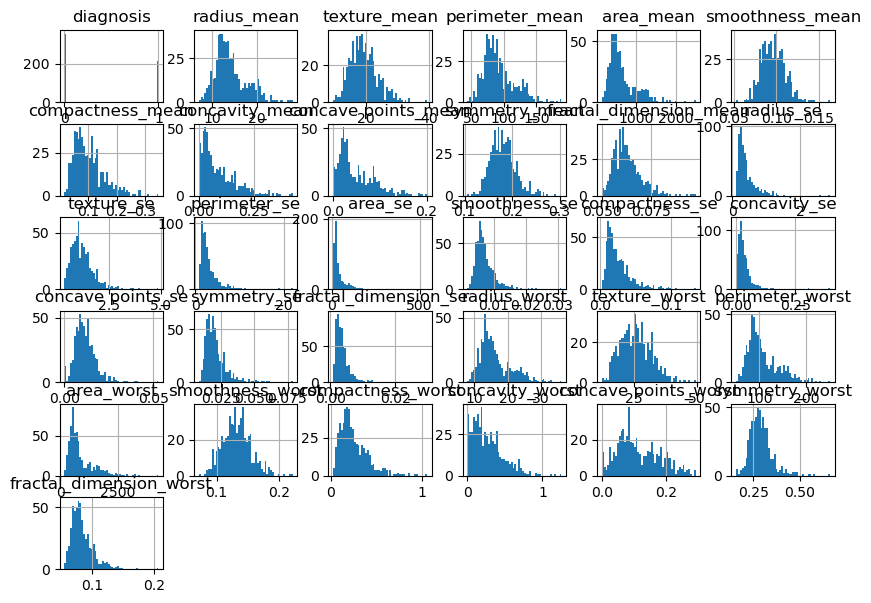

In [89]:
df.hist(bins=50,figsize=(10,7))
plt.show()

<Axes: >

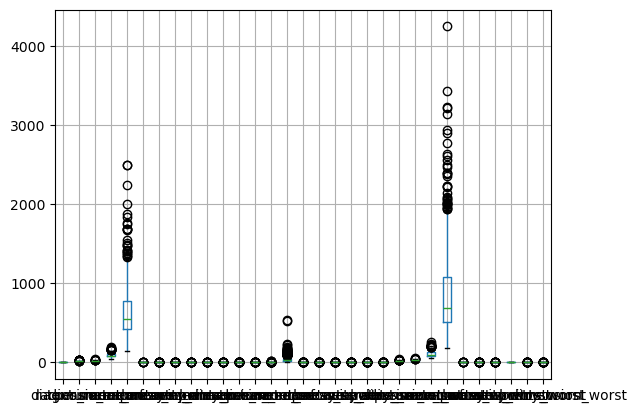

In [90]:
df.boxplot()

In [91]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [92]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state=42)

In [93]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [103]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)


c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [104]:
y_pred = log_model.predict(x_test)

In [143]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[70  1]
 [ 1 42]]


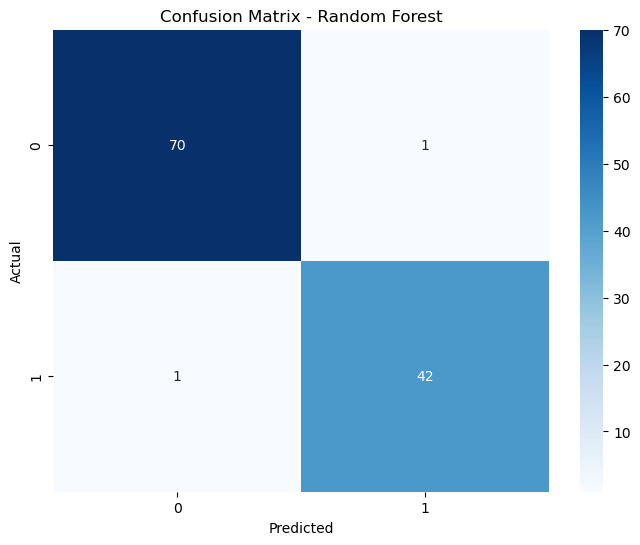

In [144]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()




In [145]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
Recall: 0.9767441860465116
Precision: 0.9767441860465116
F1 Score: 0.9767441860465116

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [146]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
y_probs = log_model.predict_proba(x_test)[:, 1]

In [148]:
threshold = 0.3
y_pred_new = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred_new))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9824561403508771


# Smote

In [149]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

print(classification_report(y_test, y_pred_new))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9824561403508771


# KNN

In [150]:
knn= KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [151]:
y_pred = knn.predict(x_test)

In [152]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Recall: 0.8837209302325582
Precision: 1.0
F1 Score: 0.9382716049382716

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [153]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [122]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_proba_knn = knn.predict_proba(x_test)[:, 1]
threshold_knn = 0.4  
y_pred_knn = (y_proba_knn >= threshold_knn).astype(int)


print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Recall (class 1):", recall_score(y_test, y_pred_knn, pos_label=1))
print("KNN Precision (class 1):", precision_score(y_test, y_pred_knn, pos_label=1))
print("KNN F1-score (class 1):", f1_score(y_test, y_pred_knn, pos_label=1))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.956140350877193
KNN Recall (class 1): 1.0
KNN Precision (class 1): 0.8958333333333334
KNN F1-score (class 1): 0.945054945054945

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        71
           1       0.90      1.00      0.95        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [124]:
target = 'diagnosis'  
x = df.drop(columns=[target])
y = df[target]
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf', class_weight={0:1, 1:3}, random_state=42)

svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9298245614035088

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.87      0.95      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# Gaussian

In [125]:
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])


nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred = nb_model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred, pos_label=1))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Recall (class 1): 0.9302325581395349
Precision: 1.0
F1 Score: 0.963855421686747

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# decision Tree

In [127]:
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


dt_model = DecisionTreeClassifier(
    criterion='entropy',       
    max_depth=6,             
    min_samples_split=5,      
    class_weight='balanced',  
    random_state=42
)


dt_model.fit(x_train, y_train)


y_pred = dt_model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred, pos_label=1))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Recall (class 1): 0.9069767441860465
Precision: 0.975
F1 Score: 0.9397590361445783

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Random Forest 


In [129]:
le = LabelEncoder()
for col in X.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])


rf_model = RandomForestClassifier(
    n_estimators=200,          
    max_depth=10,              
    min_samples_split=5,        
    class_weight='balanced',    
    random_state=42
)


rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred, pos_label=1))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Recall (class 1): 0.9534883720930233
Precision: 0.9761904761904762
F1 Score: 0.9647058823529412

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Bagging 


In [131]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(class_weight={0:1, 1:3}),  
    n_estimators=100,
    random_state=42
)


bagging.fit(x_train, y_train)


y_pred = bagging.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9912280701754386
Recall (class 1): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      1.00      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# Adaboost classifier

In [133]:
boosting = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, class_weight={0:1, 1:3}),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

boosting.fit(x_train, y_train)


y_pred = boosting.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Recall (class 1): 0.9534883720930233

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [134]:
estimators = [
    ('svm', SVC(probability=True, class_weight={0:1, 1:3}, kernel='rbf', C=1)),
    ('rf', RandomForestClassifier(n_estimators=200, class_weight={0:1, 1:3}, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
]


final_estimator = LogisticRegression(class_weight={0:1, 1:3}, max_iter=1000)


stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True
)


stacking.fit(x_train, y_train)


y_pred = stacking.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Recall (class 1): 0.9534883720930233

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print("SMOTE:")
print(y_train_res.value_counts())


rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500, class_weight='balanced')
svc = SVC(probability=True, class_weight='balanced', random_state=42)
xgb = XGBClassifier(n_estimators=200, random_state=42, scale_pos_weight=1)  


voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('lr', lr),
        ('svc', svc),
        ('xgb', xgb)
    ],
    voting='soft'
)



voting_clf.fit(x_train_res, y_train_res)
""

y_pred = voting_clf.predict(x_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (Class 1):", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SMOTE:
diagnosis
0    286
1    286
Name: count, dtype: int64


c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9649122807017544
Recall (Class 1): 0.9302325581395349

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=10) 
X_pca = pca.fit_transform(X_scaled)


X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
recall_class1 = recall_score(y_test, y_pred, pos_label=1)

print(f"PCA + Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Recall (Class 1): {recall_class1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

PCA + Logistic Regression Accuracy: 0.9825
Recall (Class 1): 0.9767

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [140]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'l1_ratio': [0, 0.5, 1]  
}


grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)


print("Best Parameters:", grid_search.best_params_)


y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'C': 100, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 119

In [141]:

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions={
        'C': uniform(0.01, 100),
        'solver': ['liblinear', 'saga', 'lbfgs'],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'l1_ratio': [0, 0.5, 1]
    },
    n_iter=50,  
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(x_train, y_train)

print("Best Parameters (Random Search):", random_search.best_params_)
y_pred_random = random_search.predict(x_test)
print(classification_report(y_test, y_pred_random))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters (Random Search): {'C': np.float64(96.53553072641381), 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\micha\miniconda3\envs\my_data_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 119

<function matplotlib.pyplot.show(close=None, block=None)>

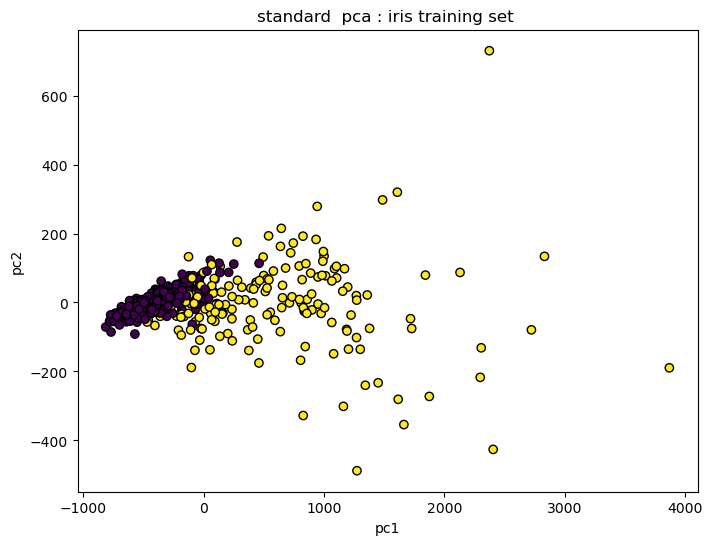

In [155]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_oca = pca.transform(x_test)

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_train_pca[:,0] , x_train_pca[:,1] , c=y_train , cmap= 'viridis' , edgecolors= 'k')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('standard  pca : iris training set ')
plt.show 